# Step 1:
# 1.Importing Data Set 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# 2.Separate x(Gender,Height) and y(y=Weight)

In [4]:
x= df.drop('Weight', axis=1)
y=df['Weight']

In [5]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [6]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
x.Gender=le.fit_transform(x.Gender)

In [11]:
x.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

# 3:Splitting Data Set

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70,random_state=1)#Test_size=.30

# 4. Linear Regression

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [17]:
lr.coef_ # m=lr.coef_

array([19.34359322,  5.96887438])

In [18]:
lr.intercept_ # c=lr.intercept_

-244.5528090325586

In [19]:
lr.predict(xtest)

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [20]:
lr.score(x,y).reshape(-1, 1)

array([[0.89994243]])

In [21]:
#m=lr.coef_
#c=lr.intercept_

In [22]:
#x=68.781904
#y=(m * x)+c

In [23]:
#y

# 5. Evaluating Model(Accuracy,MSE,MAE)

In [24]:
lr.score(xtrain, ytrain)

0.8972135459668117

In [25]:
lr.score(xtest,ytest)

0.905995960709116

In [26]:
# To find out Error Difference between real value of height and pred(Predicted value) 
from sklearn.metrics import mean_squared_error # MSE
pred=lr.predict(xtest)
mse=mean_squared_error(ytest,pred) #testing error;ytest=actual value;pred=predicted value of y

In [27]:
mse

99.67250998070037

In [28]:
from sklearn.metrics import mean_absolute_error #MAE
mae=mean_absolute_error(ytest,pred)

In [29]:
mae

7.9821325927291324

# 6. KNN Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knr = KNeighborsRegressor()

In [32]:
knr.fit(xtrain, ytrain)

KNeighborsRegressor()

In [33]:
knr.predict(xtest)

array([150.1761117 , 197.46276978, 179.03501546, ..., 160.26227546,
       180.65461322, 200.56451578])

# 7.Model Evaluation

In [34]:
knr.score(x,y).reshape(-1, 1)

array([[0.90678572]])

In [35]:
knr.score(xtest, ytest)

0.8838502073708883

In [36]:
# To find out Error Difference between real value of height and pred(Predicted value) 
from sklearn.metrics import mean_squared_error # MSE
pred=knr.predict(xtest)
mse=mean_squared_error(ytest,pred) #testing error;ytest=actual value;pred=predicted value of y

In [37]:
mse

123.15365863436983

In [38]:
from sklearn.metrics import mean_absolute_error #MAE
mae=mean_absolute_error(ytest,pred)

In [39]:
mae

8.850747809837165

# TUNNING

In [40]:
n_neighbors=np.random.randint(20,200,25)
weights = ['uniform', 'distance']
algorithm = ['auto']
leaf_size=np.random.randint(1,15,25)#Total depth of tree
p=[1,2]
#max_features=['sqrt','log2']

In [41]:

ids={
   'n_neighbors':n_neighbors,
    'weights':weights,
    'algorithm':algorithm,
    'leaf_size':leaf_size,
    'p':p,
}

In [42]:
print(ids)

{'n_neighbors': array([125, 185,  24, 161,  30,  82,  44,  67,  25,  74, 199, 198, 127,
       109, 178, 137, 198,  93, 107,  77, 142, 156,  71,  50, 181]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto'], 'leaf_size': array([ 7,  7,  4,  1, 14,  5, 12,  3,  2,  2,  2, 14,  7, 10,  7, 10,  2,
        2,  9, 14,  7,  7, 11, 12, 11]), 'p': [1, 2]}


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
rcv=RandomizedSearchCV(knr,ids,n_iter=200,cv=3)

In [45]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': array([ 7,  7,  4,  1, 14,  5, 12,  3,  2,  2,  2, 14,  7, 10,  7, 10,  2,
        2,  9, 14,  7,  7, 11, 12, 11]),
                                        'n_neighbors': array([125, 185,  24, 161,  30,  82,  44,  67,  25,  74, 199, 198, 127,
       109, 178, 137, 198,  93, 107,  77, 142, 156,  71,  50, 181]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [46]:
rcv.cv_results_

{'mean_fit_time': array([0.0113368 , 0.00733757, 0.00833853, 0.00833805, 0.00933862,
        0.00800411, 0.00800387, 0.00833766, 0.00933917, 0.01034013,
        0.01167607, 0.008672  , 0.01000547, 0.01167671, 0.01067289,
        0.00900507, 0.00867168, 0.00767144, 0.00933878, 0.00800411,
        0.00900539, 0.0090034 , 0.0086716 , 0.01267536, 0.00933901,
        0.00967224, 0.01000579, 0.00833821, 0.01200724, 0.00833813,
        0.01000667, 0.00933886, 0.00900523, 0.0110062 , 0.01034013,
        0.01033894, 0.0101738 , 0.00933798, 0.00867128, 0.00800459,
        0.00833797, 0.00800467, 0.00766857, 0.0083379 , 0.00700355,
        0.00767096, 0.00767088, 0.00767064, 0.00767104, 0.00800467,
        0.0083379 , 0.00900555, 0.00800467, 0.00867105, 0.00900443,
        0.00800498, 0.00833511, 0.009341  , 0.01000611, 0.00934013,
        0.00900531, 0.0096728 , 0.00733693, 0.00700347, 0.00733638,
        0.00767096, 0.00833813, 0.00800435, 0.00867136, 0.00733709,
        0.00767064, 0.00833782,

In [47]:
cv_result=pd.DataFrame(rcv.cv_results_)# dataFrame creation by cv_result

In [48]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011337,0.004024,0.057037,2.160973e-03,uniform,1,137,5,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.889112,0.886735,0.895826,0.890557,0.003850,56
1,0.007338,0.000471,0.024017,5.619580e-07,uniform,2,50,10,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.893376,0.890224,0.897609,0.893736,0.003025,7
2,0.008339,0.000472,0.075716,4.730562e-04,distance,2,156,4,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.878021,0.878318,0.886250,0.880863,0.003811,142
3,0.008338,0.000472,0.040362,9.441460e-04,uniform,2,77,7,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.892029,0.889016,0.896986,0.892677,0.003286,30
4,0.009339,0.000472,0.044697,3.093202e-03,uniform,1,71,1,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.892684,0.889762,0.897288,0.893245,0.003098,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.008004,0.000000,0.067046,1.635600e-03,uniform,1,156,14,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.888008,0.885773,0.894985,0.889588,0.003923,75
196,0.010006,0.000818,0.019682,1.886606e-03,uniform,2,25,7,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.892396,0.889577,0.895689,0.892554,0.002498,34
197,0.009339,0.000471,0.064710,4.719323e-04,uniform,2,125,7,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.888839,0.886510,0.895477,0.890275,0.003799,61
198,0.010673,0.000945,0.044030,8.166327e-04,uniform,1,82,2,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.891851,0.889026,0.897358,0.892745,0.003460,29


In [49]:
#Finding best score
rcv.best_score_

0.8939232296490935

In [50]:
rcv.best_params_# finding best parameter

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 44,
 'leaf_size': 7,
 'algorithm': 'auto'}

In [51]:
knr2= rcv.best_estimator_
knr2

KNeighborsRegressor(leaf_size=7, n_neighbors=44, p=1)

In [52]:
knr2.fit(xtrain, ytrain)

KNeighborsRegressor(leaf_size=7, n_neighbors=44, p=1)

In [53]:
knr2.score(xtrain,ytrain)

0.8981269022790227

In [54]:
knr2.score(xtest, ytest)

0.9034808051243388

In [55]:
knr2.score(x,y)

0.899793291103389

In [56]:
0.9034443840030851-0.8838502073708883 #difference between tuned knn and knn

0.01959417663219687

In [57]:
0.9034443840030851-0.905995960709116 #difference between tuned knn and linear regression

-0.0025515767060309003

In [58]:
pred2 = knr2.predict(xtest)
mse = mean_squared_error(ytest , pred2)
mse

102.33933017287305

In [59]:
102.37794749824596-123.15365863436983 #difference between tuned knn and knn

-20.775711136123874

In [60]:
102.37794749824596-99.67250998070037 #difference between tuned knn and linear regression

2.7054375175455903

In [61]:
mae = mean_absolute_error(ytest , pred2)
mae

8.075206030561674

In [62]:
8.078940000938092-8.850747809837165 #difference between tuned knn and knn

-0.771807808899073

In [63]:
8.078940000938092-7.9821325927291324 #difference between tuned knn and linear regression

0.09680740820895917

# STEP 2:
KNN Classifier


In [64]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [65]:
df1=df.copy()
df1.Gender=le.fit_transform(df1.Gender)
df1.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [66]:
x1= df1.drop('Gender', axis=1)
y1=df1['Gender']

In [67]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [68]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [70]:
x1train, x1test,y1train, y1test = tts(x1, y1,train_size=.70, random_state=1)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knr_clf= KNeighborsClassifier(n_neighbors=12)

In [72]:
knr_clf.fit(x1train,y1train)

KNeighborsClassifier(n_neighbors=12)

In [73]:
y1pred= knr_clf.predict(x1test)

In [75]:
knr_clf.score(x1test,y1test)

0.9209193611219322

In [76]:
knr_clf.score(x1train,y1train)

0.9201736806947228

In [77]:
knr_clf.score(x1,y1)

0.9203974284044418

# Confusion matrix, ROC curve


In [78]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [79]:
print(classification_report(y1test, y1pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1055
           1       0.94      0.93      0.93      1512

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



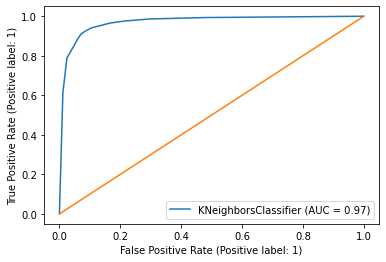

In [81]:
import matplotlib.pyplot as plt
plot_roc_curve(knr_clf, x1test, y1test)
plt.plot([0,1],[0,1])

In [82]:
from sklearn.metrics import roc_auc_score

In [84]:
auc_score1 = roc_auc_score(y1test, y1pred)

In [85]:
print(auc_score1)

0.9198350008776549
